<a href="https://colab.research.google.com/github/munawwar22HU/CS-351-AI-Project/blob/main/PreProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing neccessary modules
import pandas as pd  
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer




In [ ]:
## Importing and Cleaning Data
csv_files = glob.glob("*.data")
list_data = []
for filename in csv_files:
    data = pd.read_csv(filename,sep=",",na_values=["?"],header=None)
    list_data.append(data)
df  = pd.concat(list_data)

final_df = df.dropna()
final_df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

print(final_df.head())





    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


In [ ]:
"""
1. Age -- Numerical  *
2. Sex -- Categorical
-- Value 0 : Female
-- Value 1 : Male
3. Chest Pain Type -- Categorical
-- Value 1 : typical angina
-- Value 2 : atypical angina
-- Value 3 : non-anginal pain
-- Value 4 : asymptomatic
4. Resting Blood Pressure -- Numerical *
5. Cholestrol : serum cholestrol in mg/dl -- Numerical *
6. Fasting Blood Sugar : -- Categorical Data
-- Value 0 : Fasting Blood Sugar < 120 mg/dl
-- Value 1 : Fasting Blood Sugar > 120 mg/dl
7. Resting Electocardiographic Results -- Categorical.
-- Value 1 : Normal
-- Value 2 : Having ST-T wave abnormality
-- Value 3 : showing probable or definite left ventricular hypertrophy by Estes' criteria
8. Maximum Heart Rate During a Thallium Test -- Numerical    *
9. Excercise Induced Angina -- Categorical
-- Value 0: No
-- Value 1: Yes
10. Old Peak : ST depression induced by exercise relative to rest -- Numerical  *
11. Slope : The slope of the peak excercise ST segment. -- Categorical
-- Value 1 : upsloping 
-- Value 2 : flat
-- Value 3 : downsloping
12. CA : Number of major vessels (0-3) colored by flourosopy -- Categorical
13. Thallium Test -- Categorical
-- Value  3 : Normal
-- Value  6 : Fixed Defect
-- Value  7 : Reversable Defect
14. Num :  diagnosis of heart disease (angiographic disease status) -- Categorical 
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
"""



"\n1. Age -- Numerical  *\n2. Sex -- Categorical\n-- Value 0 : Female\n-- Value 1 : Male\n3. Chest Pain Type -- Categorical\n-- Value 1 : typical angina\n-- Value 2 : atypical angina\n-- Value 3 : non-anginal pain\n-- Value 4 : asymptomatic\n4. Resting Blood Pressure -- Numerical *\n5. Cholestrol : serum cholestrol in mg/dl -- Numerical *\n6. Fasting Blood Sugar : -- Categorical Data\n-- Value 0 : Fasting Blood Sugar < 120 mg/dl\n-- Value 1 : Fasting Blood Sugar > 120 mg/dl\n7. Resting Electocardiographic Results -- Categorical.\n-- Value 1 : Normal\n-- Value 2 : Having ST-T wave abnormality\n-- Value 3 : showing probable or definite left ventricular hypertrophy by Estes' criteria\n8. Maximum Heart Rate During a Thallium Test -- Numerical    *\n9. Excercise Induced Angina -- Categorical\n-- Value 0: No\n-- Value 1: Yes\n10. Old Peak : ST depression induced by exercise relative to rest -- Numerical  *\n11. Slope : The slope of the peak excercise ST segment. -- Categorical\n-- Value 1 : 

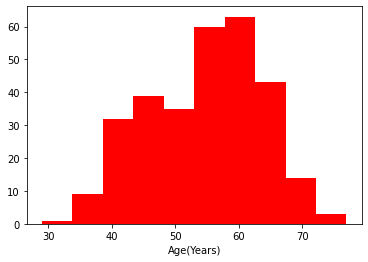

In [ ]:
plt.hist(final_df.age, facecolor='red')
plt.xlabel('Age(Years)')
plt.show()



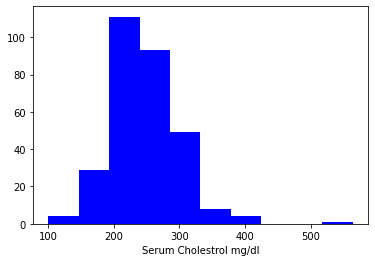

In [ ]:
plt.hist(final_df.chol, facecolor='blue')
plt.xlabel('Serum Cholestrol mg/dl')
plt.show()


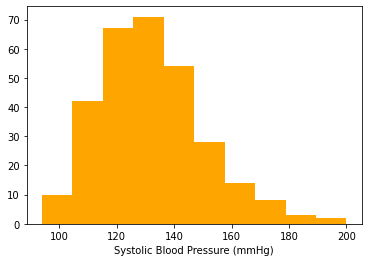

In [ ]:
plt.hist(final_df.trestbps, facecolor='orange')
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.show()

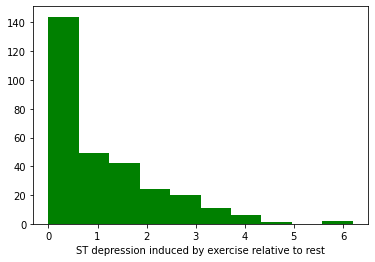

In [ ]:
plt.hist(final_df.oldpeak, facecolor='green')
plt.xlabel("ST depression induced by exercise relative to rest")
plt.show()

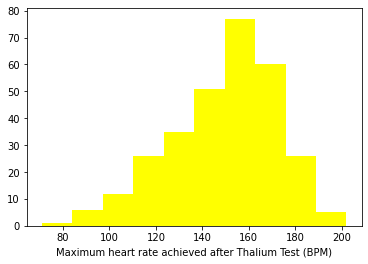

In [ ]:

plt.hist(final_df.thalach, facecolor='yellow')
plt.xlabel("Maximum heart rate achieved after Thalium Test (BPM)")
plt.show()

In [ ]:
# Grouping Numeric Data
"""
Age ranges : -
-- Value 0 : 20 - 39
-- Value 1 : 40 - 59
-- Value 2 : >60
"""
final_df['age_bins'] =  pd.cut(x=final_df['age'], bins=[20, 40, 60, 80],right=False,include_lowest = True,labels=[0,1,2])
final_df['age_bins'] = final_df['age_bins'].astype('int')

"""
Serum Cholestrol :-
-- Value 0 : Cholestrol =< 180 mg/dl
-- Value 1 : Cholestrol > 180 mg/dl
"""
final_df['cholestrol_bins'] = (final_df.chol>=180)
final_df['cholestrol_bins'] = final_df.cholestrol_bins.astype('int')

"""
Systolic Blood Pressure :-
-- Value 0 : <120
-- Value 1 : 120 - 129
-- Value 2 : 130 - 139
-- Value 3 : 140 - 179
-- Value 4 : >180
"""
final_df['trestbps_bins'] = pd.cut(x=final_df['trestbps'], bins=[0,120, 130, 140,180,240],right=False,include_lowest = True,labels=[0,1,2,3,4])
final_df.trestbps_bins = final_df.trestbps_bins.astype('int')

""" Maximum Heart Reached After Thalium Test :-
-- Value 0 : 0 -  99
-- Value 1 : 100 - 149
-- Value 2 : >150

"""
final_df['thalach_bins'] = pd.cut(x=final_df['thalach'],bins=[0,100,150,250],right=False,include_lowest = True,labels=[0,1,2])
final_df.thalach_bins = final_df.thalach_bins.astype('int')

""" ST depression induced by exercise relative to rest"
-- Value 0 : 0 - 2
-- Value 1 : 2 - 4 
-- Value 2 : >4
"""
final_df['oldpeak_bins'] = pd.cut(x=final_df['oldpeak'],bins=[0,2,4,8],right=False,include_lowest = True,labels=[0,1,2])
final_df.oldpeak_bins = final_df.oldpeak_bins.astype('int')




In [ ]:
output_df = final_df.drop(columns=['age','chol','trestbps','oldpeak','thalach'])


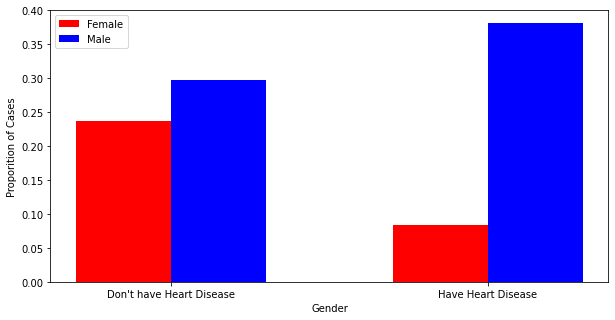

In [ ]:
wom_hc = np.sum(np.logical_and(output_df.sex == 0,output_df.num == 0))/len(output_df) # Proportion of Women who don't have Disease
wom_h  = np.sum(np.logical_and(output_df.sex == 0,output_df.num > 0))/len(output_df)  # Proportion of Women who have Disease
men_hc = np.sum(np.logical_and(output_df.sex == 1,output_df.num == 0))/len(output_df) # Proporiton of Men who don't have Disease
men_h  = np.sum(np.logical_and(output_df.sex == 1,output_df.num  >0 ))/len(output_df) # Proporiton of Men who have Disease

Female = (wom_hc,wom_h)
Male = (men_hc,men_h)

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3       

# Plotting
plt.bar(ind, Female , width, label="Female",color = 'Red')
plt.bar(ind + width, Male, width, label="Male",color = 'Blue')
plt.xlabel('Gender')
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width / 2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()


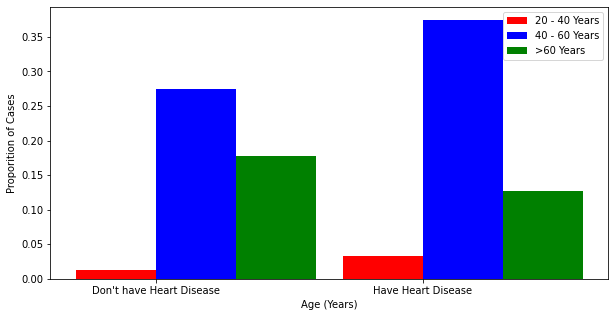

In [ ]:
age0hc  =  np.sum(np.logical_and(output_df.age_bins == 0,output_df.num == 0))/len(final_df) # Proportion of Age group 0 who don't have Disease
age0h   =  np.sum(np.logical_and(output_df.age_bins == 0,output_df.num >0))/len(final_df) # Proportion of Age group 0 who have Disease
age1hc  =  np.sum(np.logical_and(output_df.age_bins == 1,output_df.num == 0))/len(final_df) # Proportion of Age group 1 who don't have Disease
age1h   =  np.sum(np.logical_and(output_df.age_bins == 1,output_df.num > 0))/len(final_df) # Proportion of Age group 1 who have Disease
age2hc  =  np.sum(np.logical_and(output_df.age_bins == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
age2h   =  np.sum(np.logical_and(output_df.age_bins == 2,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
    

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3     

Age0 = (age0h,age0hc)
Age1 = (age1h,age1hc)
Age2 = (age2h,age2hc)

# Plotting
plt.bar(ind, Age0 , width, label="20 - 40 Years",color = 'Red')
plt.bar(ind + width, Age1, width, label="40 - 60 Years",color = 'Blue')
plt.bar(ind + 2*width, Age2, width, label=">60 Years",color = 'Green')

plt.xlabel('Age (Years)')
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width / 2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()


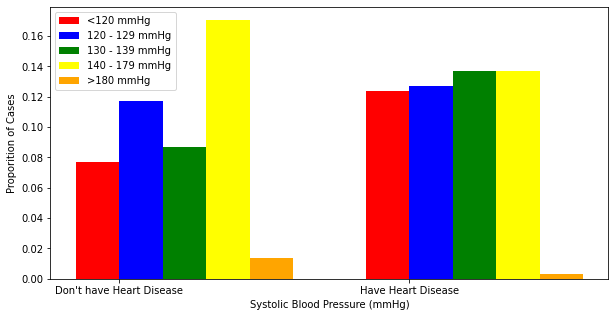

In [ ]:
bp0hc  =  np.sum(np.logical_and(output_df.trestbps_bins == 0,output_df.num == 0))/len(final_df) # Proportion of Age group 0 who don't have Disease
bp0h   =  np.sum(np.logical_and(output_df.trestbps_bins == 0,output_df.num >0))/len(final_df) # Proportion of Age group 0 who have Disease
bp1hc  =  np.sum(np.logical_and(output_df.trestbps_bins == 1,output_df.num == 0))/len(final_df) # Proportion of Age group 1 who don't have Disease
bp1h   =  np.sum(np.logical_and(output_df.trestbps_bins == 1,output_df.num > 0))/len(final_df) # Proportion of Age group 1 who have Disease
bp2hc  =  np.sum(np.logical_and(output_df.trestbps_bins == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
bp2h   =  np.sum(np.logical_and(output_df.trestbps_bins == 2,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
bp3hc  =  np.sum(np.logical_and(output_df.trestbps_bins == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
bp3h   =  np.sum(np.logical_and(output_df.trestbps_bins == 3,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
bp4hc  =  np.sum(np.logical_and(output_df.trestbps_bins == 3,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
bp4h   =  np.sum(np.logical_and(output_df.trestbps_bins == 4,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
bp4hc  =  np.sum(np.logical_and(output_df.trestbps_bins == 4,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have 
    

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.15

Bp0 = (bp0h,bp0hc)
Bp1 = (bp1h,bp1hc)
Bp2 = (bp2h,bp2hc)
Bp3 = (bp3h,bp3hc)
Bp4 = (bp4h,bp4hc)

# Plotting
plt.bar(ind , Bp0 , width, label="<120 mmHg",color = 'Red')
plt.bar(ind + width, Bp1, width, label="120 - 129 mmHg",color = 'Blue')
plt.bar(ind + 2*width, Bp2, width, label="130 - 139 mmHg",color = 'Green')
plt.bar(ind + 3*width, Bp3, width, label="140 - 179 mmHg",color = 'Yellow')
plt.bar(ind + 4*width, Bp4, width, label=">180 mmHg",color = 'Orange')


plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width/2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()


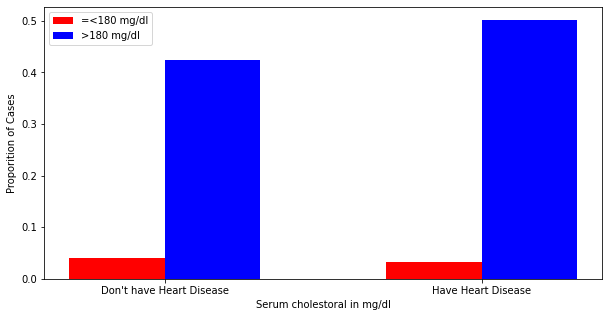

In [ ]:
chol0hc  =  np.sum(np.logical_and(output_df.cholestrol_bins == 0,output_df.num == 0))/len(final_df) # Proportion of Chol group 0 who don't have Disease
chol0h   =  np.sum(np.logical_and(output_df.cholestrol_bins == 0,output_df.num >0))/len(final_df) # Proportion of Chol group 0 who have Disease
chol1hc  =  np.sum(np.logical_and(output_df.cholestrol_bins == 1,output_df.num == 0))/len(final_df) # Proportion of Chol group 1 who don't have Disease
chol1h   =  np.sum(np.logical_and(output_df.cholestrol_bins == 1,output_df.num >0))/len(final_df) # Proportion of Chol group 1 who have Disease


N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3

Chol0 = (chol0h,chol0hc)
Chol1 = (chol1h,chol1hc)


# Plotting
plt.bar(ind , Chol0 , width, label="=<180 mg/dl",color = 'Red')
plt.bar(ind + width, Chol1 , width, label=">180 mg/dl",color = 'Blue')



plt.xlabel('Serum cholestoral in mg/dl')
plt.ylabel('Proporition of Cases')
plt.xticks(ind+width/2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()

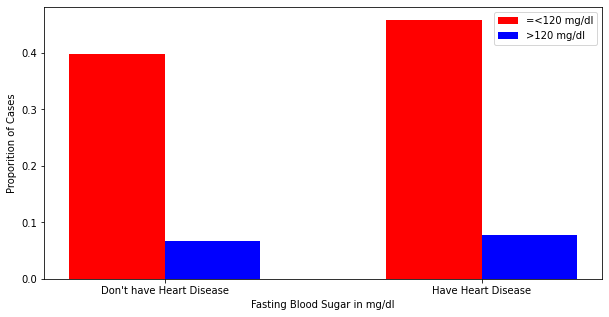

In [ ]:
fbs0hc  =  np.sum(np.logical_and(output_df.fbs == 0,output_df.num == 0))/len(final_df) # Proportion of Chol group 0 who don't have Disease
fbs0h   =  np.sum(np.logical_and(output_df.fbs == 0,output_df.num >0))/len(final_df) # Proportion of Chol group 0 who have Disease
fbs1hc  =  np.sum(np.logical_and(output_df.fbs == 1,output_df.num == 0))/len(final_df) # Proportion of Chol group 1 who don't have Disease
fbs1h   =  np.sum(np.logical_and(output_df.fbs == 1,output_df.num >0))/len(final_df) # Proportion of Chol group 1 who have Disease


N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3

Fbs0 = (fbs0h,fbs0hc)
Fbs1 = (fbs1h,fbs1hc)


# Plotting
plt.bar(ind , Fbs0 , width, label="=<120 mg/dl",color = 'Red')
plt.bar(ind + width, Fbs1 , width, label=">120 mg/dl",color = 'Blue')



plt.xlabel('Fasting Blood Sugar in mg/dl')
plt.ylabel('Proporition of Cases')
plt.xticks(ind+width/2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()

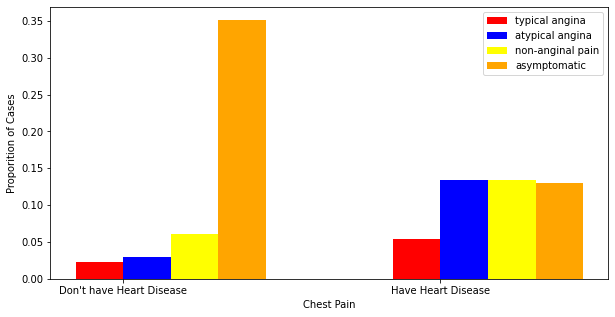

In [ ]:
cp1hc  =  np.sum(np.logical_and(output_df.cp == 1,output_df.num == 0))/len(final_df) # Proportion of Age group 1 who don't have Disease
cp1h   =  np.sum(np.logical_and(output_df.cp == 1,output_df.num > 0))/len(final_df) # Proportion of Age group 1 who have Disease
cp2hc  =  np.sum(np.logical_and(output_df.cp == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
cp2h   =  np.sum(np.logical_and(output_df.cp == 2,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
cp3hc  =  np.sum(np.logical_and(output_df.cp == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
cp3h   =  np.sum(np.logical_and(output_df.cp == 3,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
cp4hc  =  np.sum(np.logical_and(output_df.cp == 3,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
cp4h   =  np.sum(np.logical_and(output_df.cp == 4,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
cp4hc  =  np.sum(np.logical_and(output_df.cp == 4,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have 
    

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.15

Cp1 = (cp1h,cp1hc)
Cp2 = (cp2h,cp2hc)
Cp3 = (cp3h,cp3hc)
Cp4 = (cp4h,cp4hc)


# Plotting
plt.bar(ind , Cp1 , width, label="typical angina",color = 'Red')
plt.bar(ind + width, Cp2, width, label="atypical angina",color = 'Blue')
plt.bar(ind + 2*width, Cp3, width, label="non-anginal pain",color = 'Yellow')
plt.bar(ind + 3*width, Cp4, width, label="asymptomatic",color = 'Orange')


plt.xlabel('Chest Pain')
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width/2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()


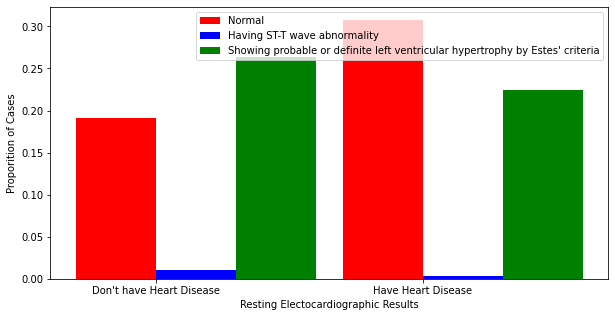

In [ ]:
recg0hc  =  np.sum(np.logical_and(output_df.restecg == 0,output_df.num == 0))/len(final_df) # Proportion of Age group 1 who don't have Disease
recg0h   =  np.sum(np.logical_and(output_df.restecg == 0,output_df.num > 0))/len(final_df) # Proportion of Age group 1 who have Disease
recg1hc  =  np.sum(np.logical_and(output_df.restecg == 1,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
recg1h   =  np.sum(np.logical_and(output_df.restecg == 1,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
recg2hc  =  np.sum(np.logical_and(output_df.restecg == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
recg2h   =  np.sum(np.logical_and(output_df.restecg == 2,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
    

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3     

Recg0 = (recg0h,recg0hc)
Recg1 = (recg1h,recg1hc)
Recg2 = (recg2h,recg2hc)

# Plotting
plt.bar(ind, Recg0 , width, label="Normal",color = 'Red')
plt.bar(ind + width, Recg1, width, label="Having ST-T wave abnormality",color = 'Blue')
plt.bar(ind + 2*width, Recg2, width, label="Showing probable or definite left ventricular hypertrophy by Estes' criteria",color = 'Green')

plt.xlabel('Resting Electocardiographic Results')
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width / 2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()

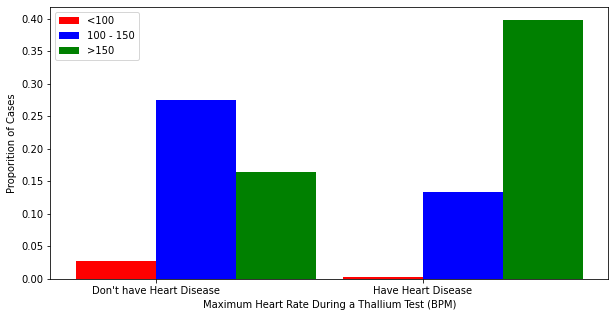

In [ ]:
thalach0hc  =  np.sum(np.logical_and(output_df.thalach_bins == 0,output_df.num == 0))/len(final_df) # Proportion of Age group 1 who don't have Disease
thalach0h   =  np.sum(np.logical_and(output_df.thalach_bins == 0,output_df.num > 0))/len(final_df) # Proportion of Age group 1 who have Disease
thalach1hc  =  np.sum(np.logical_and(output_df.thalach_bins == 1,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
thalach1h   =  np.sum(np.logical_and(output_df.thalach_bins == 1,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
thalach2hc  =  np.sum(np.logical_and(output_df.thalach_bins == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
thalach2h   =  np.sum(np.logical_and(output_df.thalach_bins == 2,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
    

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3     

Thalach0 = (thalach0h,thalach0hc)
Thalach1 = (thalach1h,thalach1hc)
Thalach2 = (thalach2h,thalach2hc)

# Plotting
plt.bar(ind, Thalach0 , width, label="<100",color = 'Red')
plt.bar(ind + width, Thalach1, width, label="100 - 150",color = 'Blue')
plt.bar(ind + 2*width, Thalach2, width, label=">150",color = 'Green')

plt.xlabel('Maximum Heart Rate During a Thallium Test (BPM)')
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width / 2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()

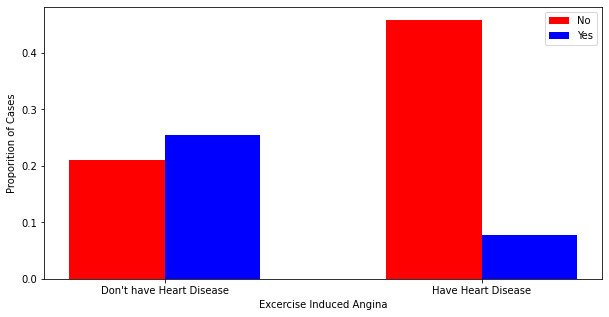

In [ ]:
exgang0hc  =  np.sum(np.logical_and(output_df.exang == 0,output_df.num == 0))/len(final_df) # Proportion of Chol group 0 who don't have Disease
exgang0h   =  np.sum(np.logical_and(output_df.exang == 0,output_df.num >0))/len(final_df) # Proportion of Chol group 0 who have Disease
exgang1hc  =  np.sum(np.logical_and(output_df.exang == 1,output_df.num == 0))/len(final_df) # Proportion of Chol group 1 who don't have Disease
exgang1h   =  np.sum(np.logical_and(output_df.exang == 1,output_df.num >0))/len(final_df) # Proportion of Chol group 1 who have Disease


N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3

Exgang0 = (exgang0h,exgang0hc)
Exgang1 = (exgang1h,exgang1hc)


# Plotting
plt.bar(ind , Exgang0 , width, label="No",color = 'Red')
plt.bar(ind + width, Exgang1 , width, label="Yes",color = 'Blue')



plt.xlabel('Excercise Induced Angina')
plt.ylabel('Proporition of Cases')
plt.xticks(ind+width/2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()

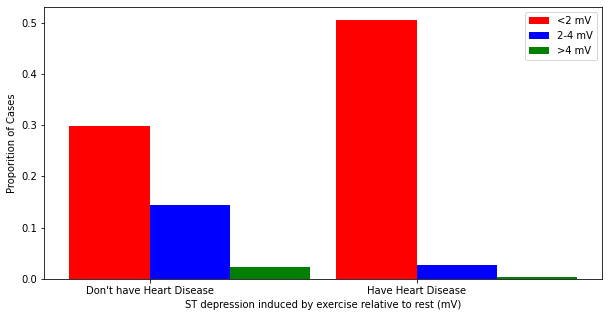

In [ ]:
""" ST depression induced by exercise relative to rest"
-- Value 0 : 0 - 2
-- Value 1 : 2 - 4 
-- Value 2 : >4
"""
oldpeak0hc  =  np.sum(np.logical_and(output_df.oldpeak_bins == 0,output_df.num == 0))/len(final_df) # Proportion of Age group 1 who don't have Disease
oldpeak0h   =  np.sum(np.logical_and(output_df.oldpeak_bins == 0,output_df.num > 0))/len(final_df) # Proportion of Age group 1 who have Disease
oldpeak1hc  =  np.sum(np.logical_and(output_df.oldpeak_bins == 1,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
oldpeak1h   =  np.sum(np.logical_and(output_df.oldpeak_bins == 1,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
oldpeak2hc  =  np.sum(np.logical_and(output_df.oldpeak_bins == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
oldpeak2h   =  np.sum(np.logical_and(output_df.oldpeak_bins == 2,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
    

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3     

Oldpeak0 = (oldpeak0h,oldpeak0hc)
Oldpeak1 = (oldpeak1h,oldpeak1hc)
Oldpeak2 = (oldpeak2h,oldpeak2hc)

# Plotting
plt.bar(ind, Oldpeak0 , width, label="<2 mV",color = 'Red')
plt.bar(ind + width, Oldpeak1, width, label="2-4 mV",color = 'Blue')
plt.bar(ind + 2*width, Oldpeak2, width, label=">4 mV",color = 'Green')

plt.xlabel('ST depression induced by exercise relative to rest (mV)')
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width / 2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()

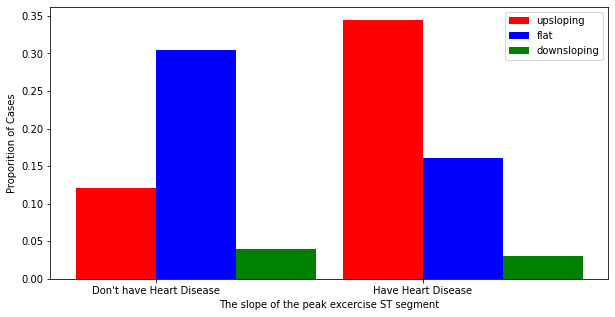

In [ ]:
"""
Slope : The slope of the peak excercise ST segment. -- Categorical
-- Value 1 : upsloping 
-- Value 2 : flat
-- Value 3 : downsloping
"""

slope1hc  =  np.sum(np.logical_and(output_df.slope == 1,output_df.num == 0))/len(final_df) # Proportion of Age group 1 who don't have Disease
slope1h   =  np.sum(np.logical_and(output_df.slope == 1,output_df.num > 0))/len(final_df) # Proportion of Age group 1 who have Disease
slope2hc  =  np.sum(np.logical_and(output_df.slope == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
slope2h   =  np.sum(np.logical_and(output_df.slope == 2,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
slope3hc  =  np.sum(np.logical_and(output_df.slope == 3,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
slope3h   =  np.sum(np.logical_and(output_df.slope == 3,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
    

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3     

Slope0 = (slope1h,slope1hc)
Slope1 = (slope2h,slope2hc)
Slope2 = (slope3h,slope3hc)

# Plotting
plt.bar(ind, Slope0 , width, label="upsloping",color = 'Red')
plt.bar(ind + width, Slope1, width, label="flat",color = 'Blue')
plt.bar(ind + 2*width, Slope2, width, label="downsloping",color = 'Green')

plt.xlabel('The slope of the peak excercise ST segment')
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width / 2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()

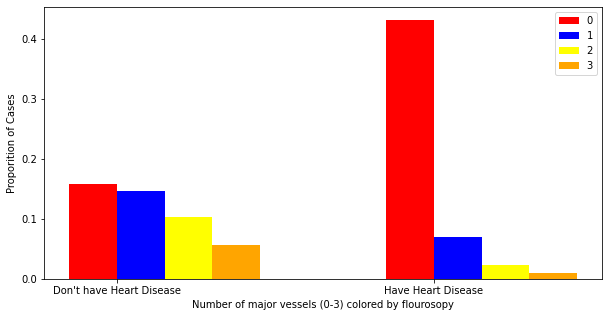

In [ ]:
"CA : Number of major vessels (0-3) colored by flourosopy"
ca0hc  =  np.sum(np.logical_and(output_df.ca == 0,output_df.num == 0))/len(final_df) # Proportion of Age group 1 who don't have Disease
ca0h   =  np.sum(np.logical_and(output_df.ca == 0,output_df.num > 0))/len(final_df) # Proportion of Age group 1 who have Disease
ca1hc  =  np.sum(np.logical_and(output_df.ca == 1,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
ca1h   =  np.sum(np.logical_and(output_df.ca == 1,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
ca2hc  =  np.sum(np.logical_and(output_df.ca == 2,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
ca2h   =  np.sum(np.logical_and(output_df.ca == 2,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
ca3hc  =  np.sum(np.logical_and(output_df.ca == 3,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
ca3h   =  np.sum(np.logical_and(output_df.ca == 3,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
 
    

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.15

Ca0 = (ca0h,ca0hc)
Ca1 = (ca1h,ca1hc)
Ca2= (ca2h,ca2hc)
Ca3 = (ca3h,ca3hc)


# Plotting
plt.bar(ind , Ca0 , width, label="0",color = 'Red')
plt.bar(ind + width, Ca1, width, label="1",color = 'Blue')
plt.bar(ind + 2*width, Ca2, width, label="2",color = 'Yellow')
plt.bar(ind + 3*width, Ca3, width, label="3",color = 'Orange')


plt.xlabel("Number of major vessels (0-3) colored by flourosopy")
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width/2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()


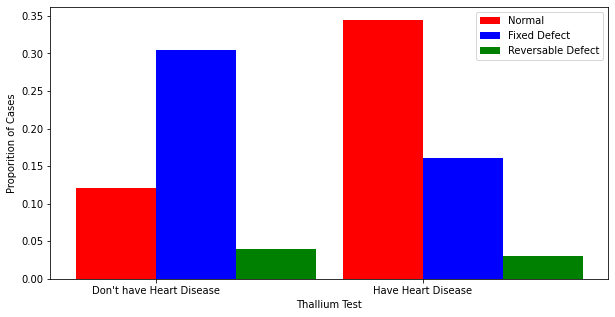

In [ ]:
"""
13. Thallium Test -- Categorical
-- Value  3 : Normal
-- Value  6 : Fixed Defect
-- Value  7 : Reversable Defect
"""

thal3hc  =  np.sum(np.logical_and(output_df.thal == 3,output_df.num == 0))/len(final_df) # Proportion of Age group 1 who don't have Disease
thal3h   =  np.sum(np.logical_and(output_df.thal == 3,output_df.num > 0))/len(final_df) # Proportion of Age group 1 who have Disease
thal6hc  =  np.sum(np.logical_and(output_df.thal == 6,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
thal6h   =  np.sum(np.logical_and(output_df.thal == 6,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
thal6hc  =  np.sum(np.logical_and(output_df.thal == 7,output_df.num == 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
thal6h   =  np.sum(np.logical_and(output_df.thal == 7,output_df.num > 0))/len(final_df) # Proportion of Age group 2 who don't have Disease
    

N = 2
ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3     

Slope0 = (slope1h,slope1hc)
Slope1 = (slope2h,slope2hc)
Slope2 = (slope3h,slope3hc)

# Plotting
plt.bar(ind, Slope0 , width, label="Normal",color = 'Red')
plt.bar(ind + width, Slope1, width, label="Fixed Defect",color = 'Blue')
plt.bar(ind + 2*width, Slope2, width, label="Reversable Defect",color = 'Green')

plt.xlabel('Thallium Test')
plt.ylabel('Proporition of Cases')
plt.xticks(ind + width / 2, ("Don't have Heart Disease", "Have Heart Disease"))
plt.legend(loc='best')
plt.show()

In [ ]:
#output_df.to_csv('HeartData.csv')
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','label']
column1 = ['age_bins','sex','cp','trestbps_bins','cholestrol_bins','fbs','restecg','thalach_bins','exang','oldpeak_bins','slope','ca','thal','num']
temp = pd.DataFrame() 
for i in range(14):
    print(columns[i],column1[i])
    temp[columns[i]] = output_df[column1[i] ]


age age_bins
sex sex
cp cp
trestbps trestbps_bins
chol cholestrol_bins
fbs fbs
restecg restecg
thalach thalach_bins
exang exang
oldpeak oldpeak_bins
slope slope
ca ca
thal thal
label num


In [ ]:
temp['label'] = temp.label==0
temp['label'] = temp.label.astype('int')
temp.to_csv('HeartData.csv',index = False)
